## Basics - functions and classes
In this tutorial a solution of 2D traveling salesman problem is presented as an example to practice Python classes and functions.

## Traveling salesman problem (https://en.wikipedia.org/wiki/Travelling_salesman_problem)
Consider 2d flat world (X, Y coords) and point of origin (starting point):

In [1]:
ORIGIN = (0, 0)
TOWNS = {
    # name : (X, Y),
    "Praha": (3, 6),
    "Brno": (5, -1),
    "Plzeň": (-3, 0),
    "Cheb": (-10, 10),
    "Vídeň": (-7, 8),
    "Berlin": (1, -6),
    "Doksy": (3, -7),
    "Jihlava": (4, 0),
    "Benešov": (-7, -10),
    "Buštěhrad": (6, 8),
    "Brtnice": (3, -5),
    "Břidličná": (-1, 3),
    "Veselí": (-4, -5),
    "Pardubice": (-8, -2),
    "Chotěšov": (-2, 7),
    "Karlovy Vary": (10, -8),
    "Pardubice": (8, 2),
    "Ostrava": (-9, -4),
}

## Drawing function
No need to understand how it works at this point - we can use this function blindly to draw any travel route in our flat world:

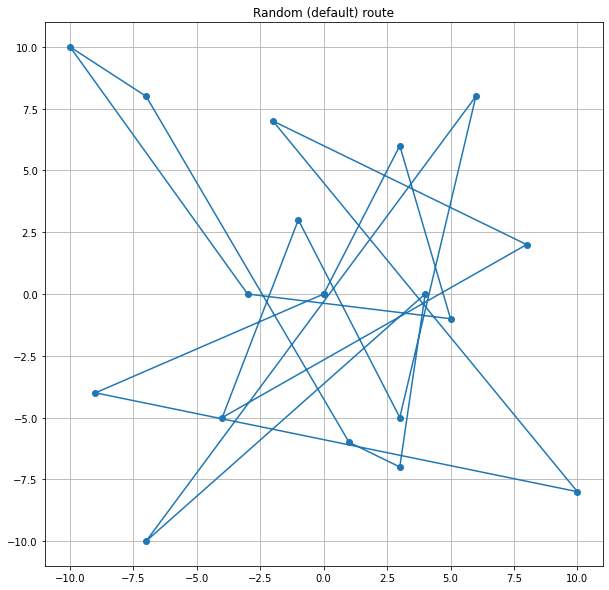

In [2]:
import matplotlib.pylab as plt

def draw_route(towns, origin, route, title="No title"):
    x = [origin[0],] + [towns[name][0] for name in route] + [origin[0],]
    y = [origin[1],] + [towns[name][1] for name in route] + [origin[1],]
    plt.figure(figsize=(10, 10))
    plt.title(title)
    plt.grid()
    plt.plot(x, y, "o-")
    plt.show()
    
route = list(TOWNS.keys())
draw_route(TOWNS, ORIGIN, route, title="Random (default) route")
plt.show()

## Class representing single Route

The following class represents a single possible route of our traveling salesmen

* route is initted with random order of towns
* the total route distance is calculated during creation
* the route has ability to mutate iself (swap two towns)

In [3]:
import random

class Route():
    
    def __init__(self):
        self.route = self.get_route()
        self.calc_distance()
        
    def __str__(self):
        return ", ".join(self.route)
    
    def __repr__(self):
        return self.__str__()
          
    def get_route(self):
        route = list(TOWNS.keys())
        random.shuffle(route)
        return route
    
    def calc_distance(self):
        self.distance = 0
        deltas = [ORIGIN, *[TOWNS[stop] for stop in self.route], ORIGIN]
        for idx in range(1,len(deltas)):
            c1 = complex(*deltas[idx-1])
            c2 = complex(*deltas[idx])
            self.distance += abs(c1-c2)
            
    def mutate(self):
        idx1 = random.randint(0, len(self.route)-1)
        idx2 = (idx1 + random.randint(0, len(self.route)-2)) % len(self.route)
        self.route[idx1], self.route[idx2] = self.route[idx2], self.route[idx1]
        self.calc_distance()
        
r = Route()        

print(r.distance)
r.mutate()
print(r.distance)


178.6022275722525
190.63214361253063


Note that those two distances are different

## Class representing population of Routes

* population is created with 90 random Routes
* the Routes objects are ordered according their total distance
* population can evolv - keep best individuls, mutate best individuls, and create new random routes to replace the bad (long) ones

In [4]:
import copy

class Population():
    
    def __init__(self):
        self.routes = [Route() for idx in range(90)]
        self.routes = self.order_routes()

    def order_routes(self):

        def get_distance(route):
            return route.distance

        return sorted(self.routes, key=get_distance)  
    
    def evolv(self):
        old_routes = self.routes[0:30]
        mutated_routes = []
        for route in self.routes[0:30]:
            route_copy = copy.deepcopy(route)
            route_copy.mutate()
            mutated_routes.append(route_copy)
        new_routes = [Route() for idx in range(30)]
        self.routes = old_routes + mutated_routes + new_routes
        self.routes = self.order_routes()        
    
    def __str__(self):
        return str(self.routes[0].distance)
    
    def __repr__(self):
        return self.__str__()


Now we create a population and evolv it few times to find some good route. The best route of the population is the first one because of our ordering function in Population class. See how nice and short is the resulting route (however we do know how far it is from the ultimately best route).

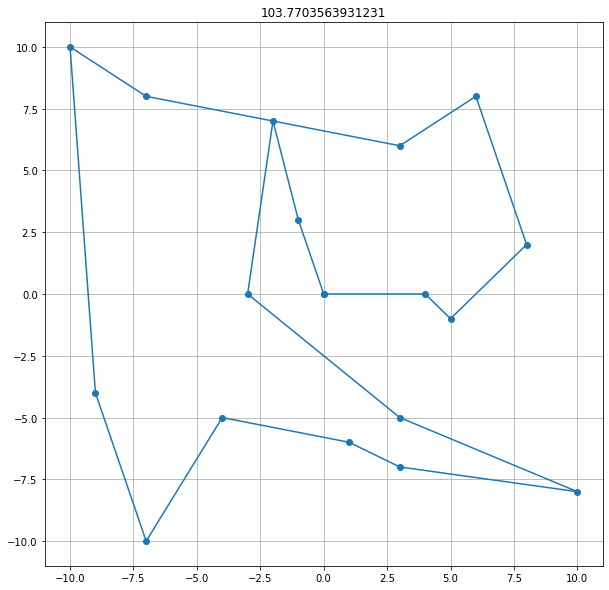

In [5]:
p = Population()

for k in range(1000):
    p.evolv()
    
draw_route(TOWNS, ORIGIN, p.routes[0].route, title=p)


## Comparision with totally random route

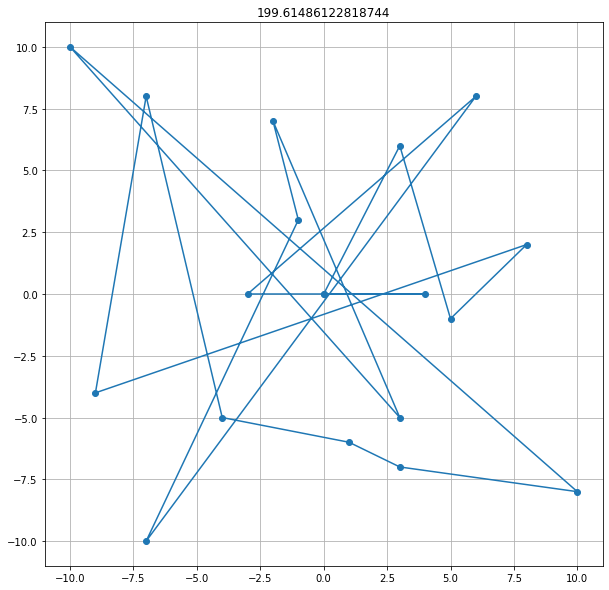

In [6]:
r = Route()
draw_route(TOWNS, ORIGIN, r.route, title=r.distance)

## Generator of random worlds (list of towns)

The next snippet create a much bigger world (more towns) with random names (uuid4) and coordinates <-100, 100>.

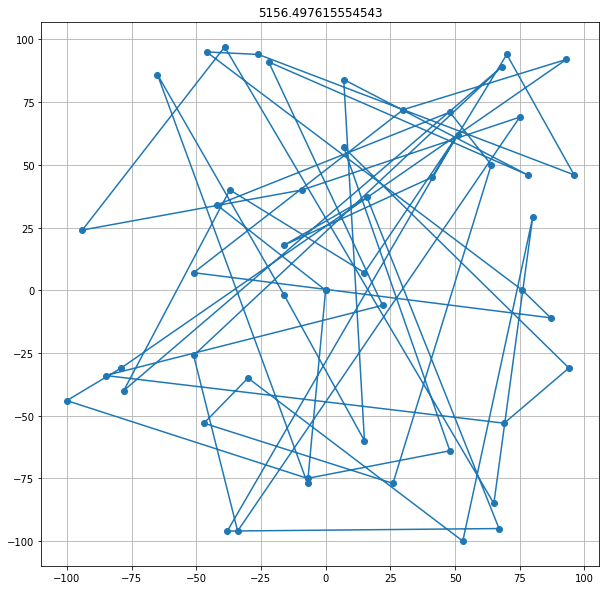

In [7]:
import uuid

TOWNS = {str(uuid.uuid4()): (random.randint(-100,100), random.randint(-100,100)) for idx in range(50)}

r = Route()
draw_route(TOWNS, ORIGIN, r.route, title=r.distance)

## Searching the best Route in bigger world

* some of the good solutions are displayed during the process
* new (better) solutions are printed to the end as distance
* after the simulation the best solution is displayed

4746.627243731513
3402.533081044356
2884.9749049344587
2464.0369595740153
2336.94507196608
2145.0105665378665
1986.4025443120345
1894.686382619572
1841.659717286393
1767.7709726565815
1679.5064771911943
1629.0305547977182
1599.7064153475349
1569.3128545351724
1558.6487874527231
1552.2507461223784
1547.5786345231577
1530.807020332368
1522.1795230957187
1521.6320274556901
1520.7910414316955


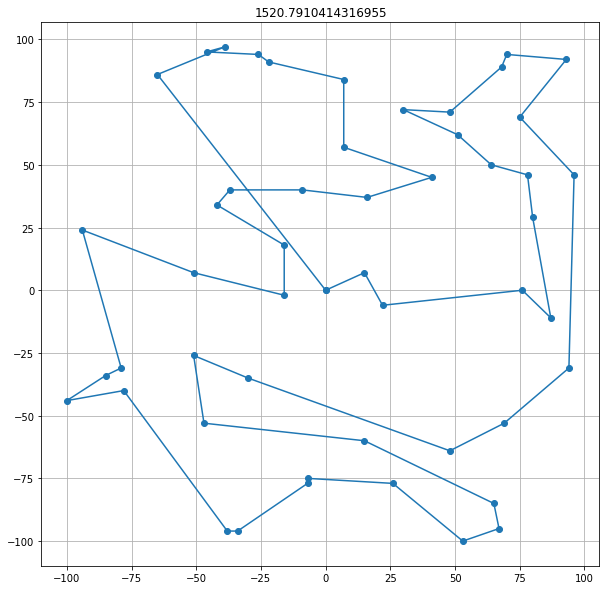

In [8]:
p = Population()

best = 1000000000000
last_k = 0

print(p.routes[0].distance)

for k in range(1000):
    p.evolv()
    new = p.routes[0].distance
    if k - last_k > 50: 
        if new < best:
            best = new
            last_k = k
            print(p.routes[0].distance)
            
print(p.routes[0].distance)
draw_route(TOWNS, ORIGIN, p.routes[0].route, title=p)
plt.show()